In [1]:
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as fits

%matplotlib widget

Create a mm-wave optical system with a fold mirror in it.

Text(0, 0.5, 'Intensity relative to entrance pupil')

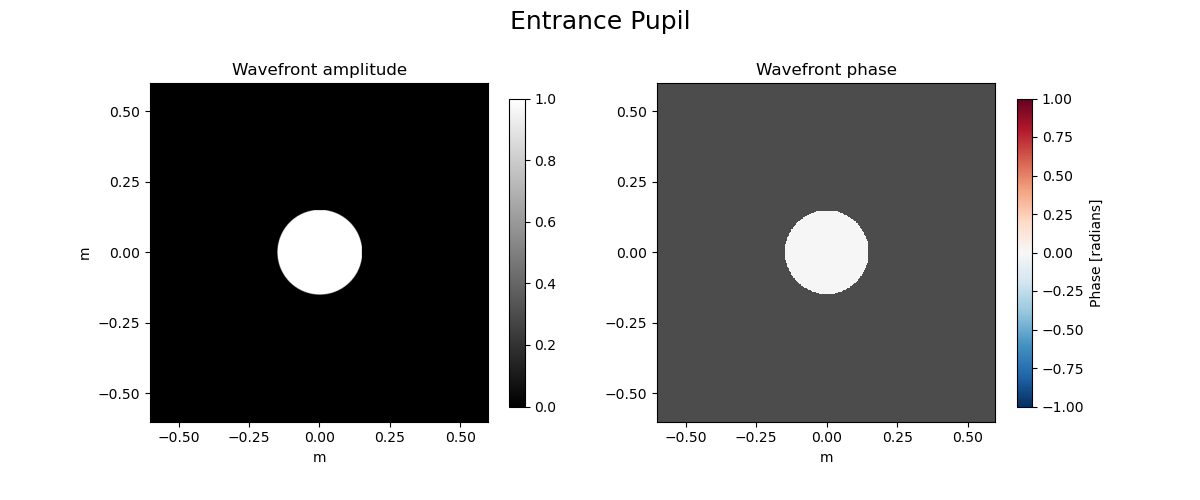

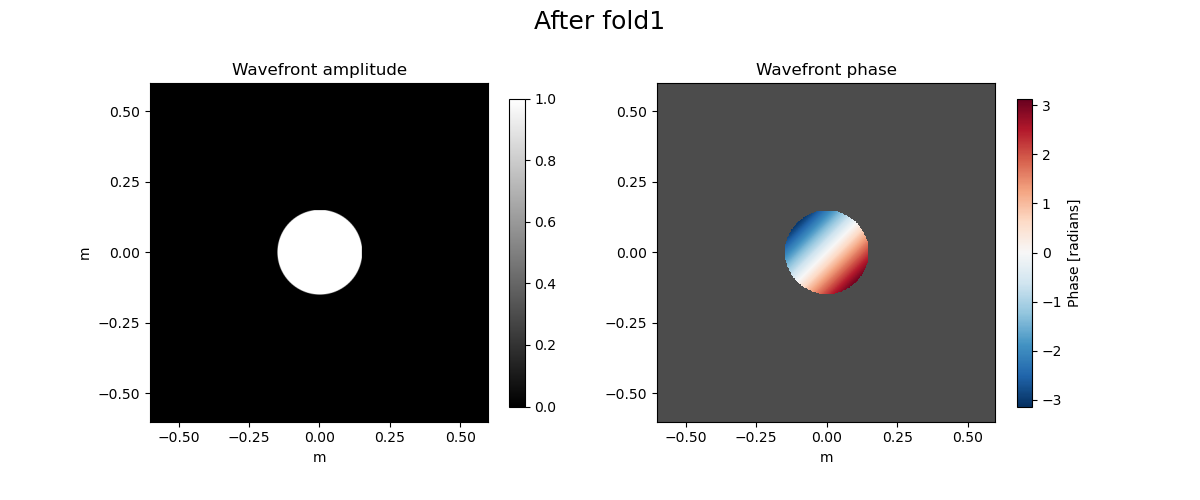

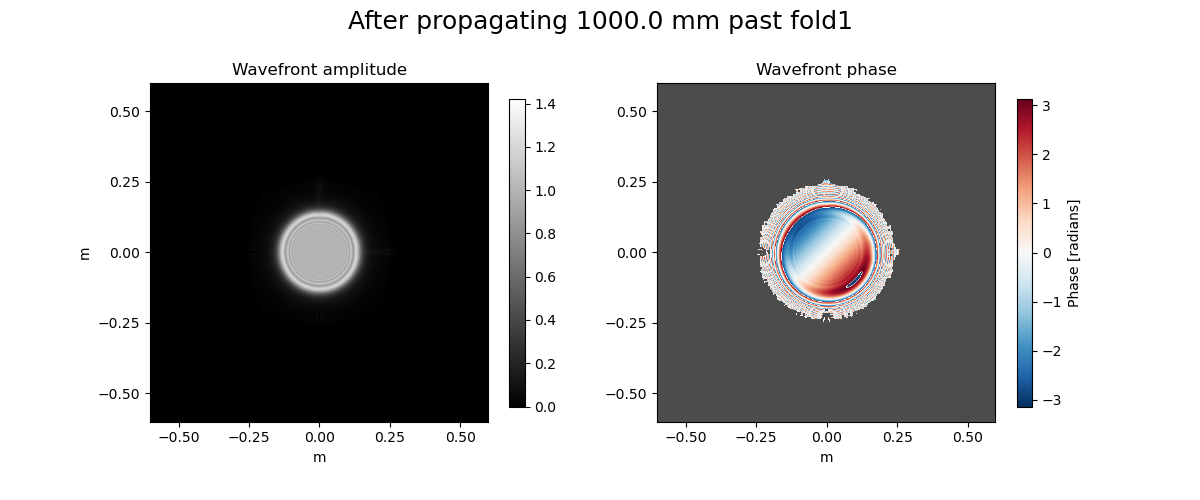

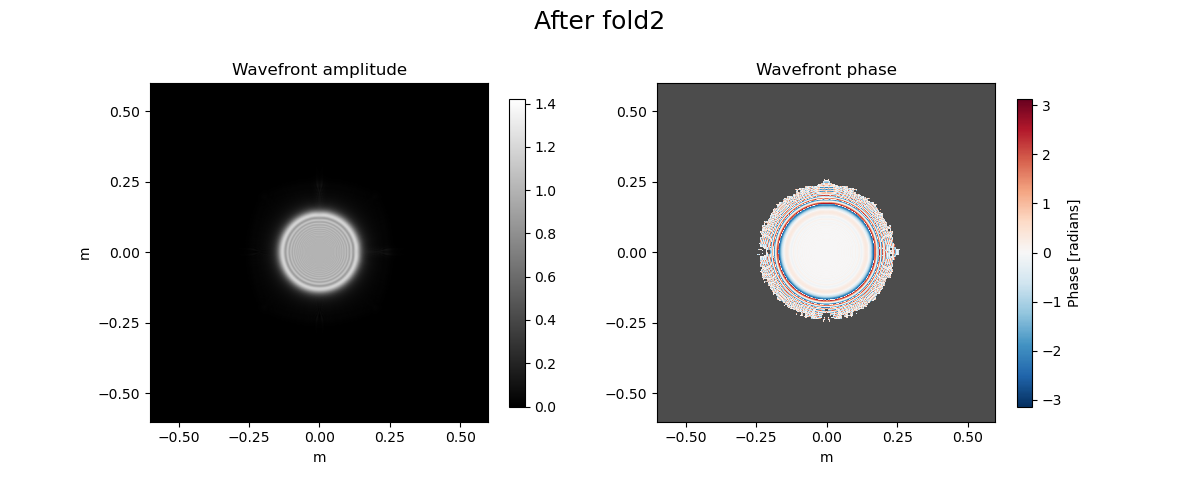

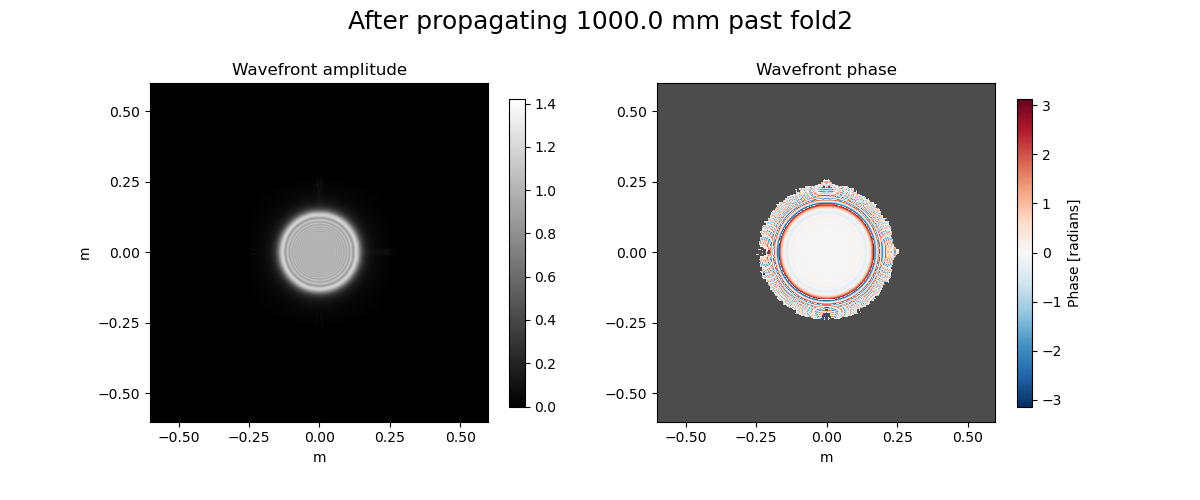

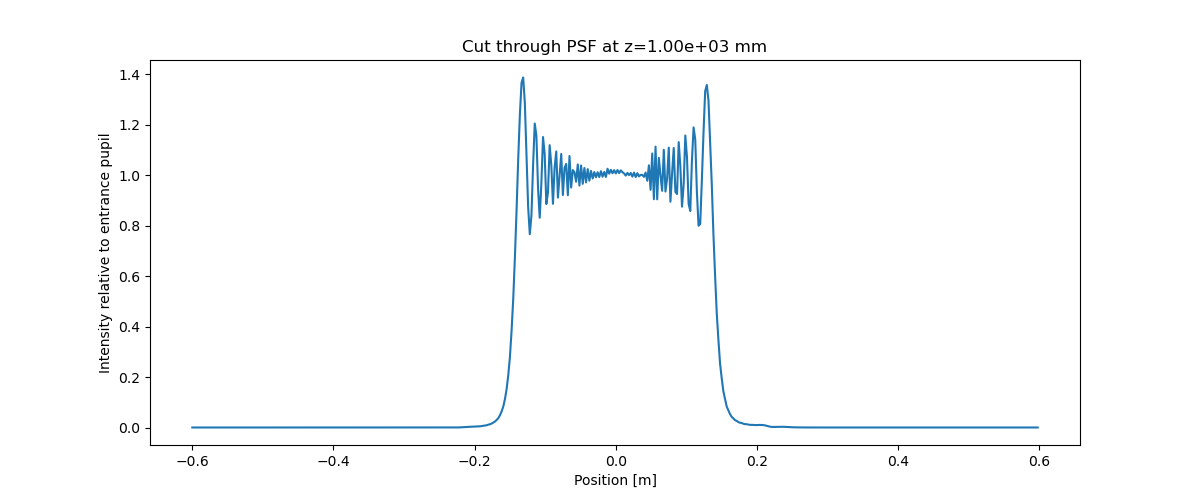

In [10]:
plt.close('all')
npix = 128
pupil_radius = 15. * u.cm
freq = 300. * u.GHz
lambd = c.c/freq

# define wavefront
wf = poppy.FresnelWavefront(pupil_radius, wavelength=lambd, npix=npix, oversample=4)
# define entrance pupil
wf *= poppy.CircularAperture(radius=pupil_radius)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, showpadding=True)
plt.suptitle("Entrance Pupil", fontsize=18)

# define fold mirror
# tilt_angle = 45. * u.deg
# tilt_angle = 0 * u.deg
tilt_angle = np.arctan(lambd / (2. * pupil_radius)) # single wave of tilt across mirror
rotation = 45. * u.deg
fold1 = poppy.TiltOpticalPathDifference(name='Tilt', tilt_angle=tilt_angle, rotation=45)
wf *= fold1

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, showpadding=True, vmax_wfe=np.pi)
plt.suptitle("After fold1", fontsize=18)

z = 1e3 * u.mm
wf.propagate_fresnel(wf.z_w0 - 0.5*u.m)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, vmax_wfe=np.pi)
plt.suptitle("After propagating {} past fold1".format(z), fontsize=18)

fold2 = poppy.TiltOpticalPathDifference(name='Tilt', tilt_angle=-tilt_angle, rotation=45)
wf *= fold2

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, showpadding=True, vmax_wfe=np.pi)
plt.suptitle("After fold2", fontsize=18)

wf.propagate_fresnel(z)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, vmax_wfe=np.pi)
plt.suptitle("After propagating {} past fold2".format(z), fontsize=18)

plt.figure(figsize=(12,5))
y, x = wf.coordinates()
plt.plot(x[wf.intensity.shape[1]//2,:], wf.intensity[wf.intensity.shape[1]//2,:])
plt.title("Cut through PSF at z={:0.2e}".format(z))
plt.xlabel('Position [m]')
plt.ylabel('Intensity relative to entrance pupil')